In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

# LLS 

In [14]:
X = np.array([[1,0.5],[1,1.5],[1,3],[1,4],[1,5]])
d = np.reshape(np.array([8,6,3,2,0.5]),(5,1))

array([[1. , 0.5],
       [1. , 1.5],
       [1. , 3. ],
       [1. , 4. ],
       [1. , 5. ]])

In [10]:
w = np.linalg.inv(X.T @X) @X.T@d

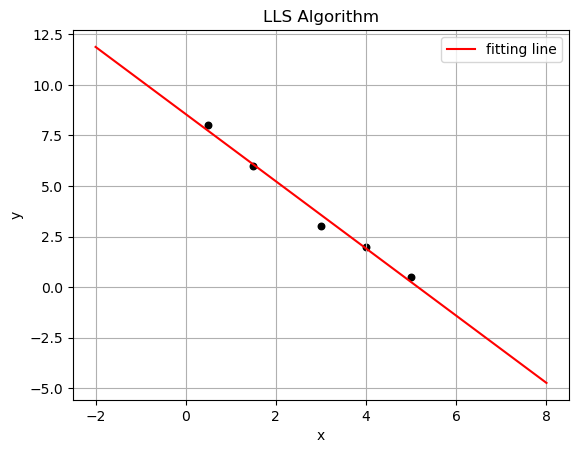

In [20]:
plt.scatter([0.5,1.5,3,4,5],[8,6,3,2,0.5],s = 22,color = 'black')
x1_values = np.linspace(-2,8,5)
x2_values = w[-1] * x1_values + w[0]

# 绘制直线
plt.plot(x1_values, x2_values, label='fitting line',color = 'r')
plt.title('LLS Algorithm')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc = 'best')

# LMS

In [128]:
ln_rate = 0.02  #0.1 0.2 
w_lms_b = []
w_lms_w = []
w_lms = np.random.rand(2,1)# w = [b,w]
X = np.array([[1,0.5],[1,1.5],[1,3],[1,4],[1,5]])
d = np.reshape(np.array([8,6,3,2,0.5]),(5,1))
E = np.zeros(5)  # error 

In [129]:
for epoch in range(100):
    w_lms_b.append(copy.deepcopy( w_lms[0]) )
    w_lms_w.append(copy.deepcopy( w_lms[1]) )
    for i in range (len(X)):
        E[i] = d[i,0]- X[i] @ w_lms
        w_lms += ln_rate * E[i] * np.reshape(X[i],(2,1))

    #print(E,'\n',w_lms)
print('w of LLS:\n',w ,'\n',' w of LMS:\n',w_lms)        

w of LLS:
 [[ 7.84532368]
 [-1.4708982 ]] 
  w of LMS:
 [[ 7.84794972]
 [-1.47151229]]


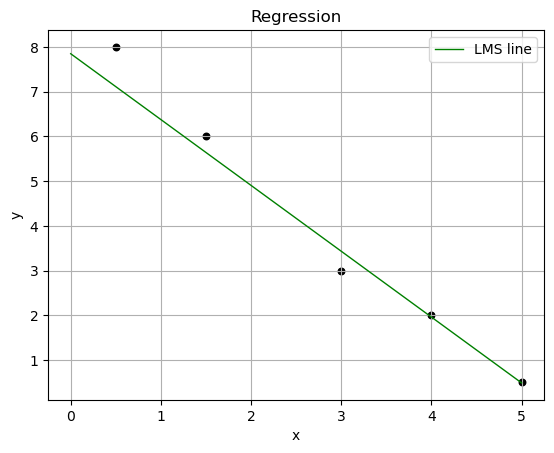

In [130]:
plt.scatter([0.5,1.5,3,4,5],[8,6,3,2,0.5],s = 22,color = 'black')
x1_values = np.linspace(0,5,2)
X_LLS = w[-1] * x1_values + w[0]
X_LMS = w_lms[-1] * x1_values + w_lms[0]
# 绘制直线
#plt.plot(x1_values, X_LLS, label='LLS line',color = 'r',linewidth  = 1.5,linestyle ='--')
plt.plot(x1_values, X_LMS, label='LMS line',color = 'green',linewidth  = 1)
plt.title('Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc = 'best')

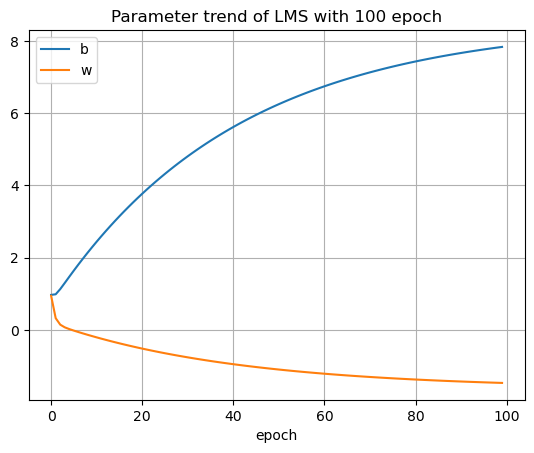

In [131]:
plt.plot(w_lms_b,label = 'b')
plt.plot(w_lms_w,label = 'w')

plt.xlabel('epoch')
plt.title('Parameter trend of LMS with 100 epoch')
plt.grid()
plt.legend(loc = 'best')